In [53]:
from scipy import constants as C
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import matplotlib.colors as mcolors

In [16]:
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

def GetFit(x,y,n):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

#_x = np.linspace(np.min(x),np.max(x),2)
#param = GetFit(x,y)
#ym = GetModel(_x,param)
#plt.errorbar(V, n1,xerr=5.25,yerr=0.015,capsize=0.5,color='r',fmt='.',label = "n=1")
#plt.text(450, 0.35, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)))

In [3]:
datos1= Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Termogenerador_r0.txt")
datos2= Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Termogenerador_r1.txt")
datos3= Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Termogenerador_r3.txt")
datos4= Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Termogenerador_r4.txt")
datos1

,V,I,Tcelda,Treostato,delta t
0,0.0070,253,20,28,8
1,0.0090,313,25,35,10
2,0.0145,389,29,42,13
3,0.0146,422,28,42,14
4,0.0157,493,26,40,14
5,0.0159,519,23,37,14
6,0.0163,523,22,38,16
7,0.0164,508,22,40,18
8,0.0166,515,23,42,19
9,0.0173,569,20,40,20


[0.00334458 0.00074197]


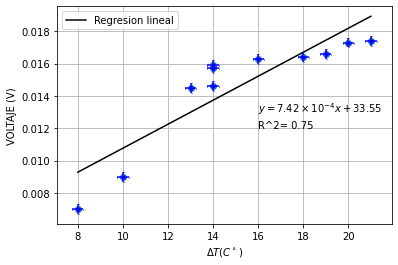

In [11]:
_x = np.linspace(np.min(datos1['delta t']),np.max(datos1['delta t']),2)
param = GetFit(datos1['delta t'],datos1['V'])
ym = GetModel(_x,param)

plt.scatter(datos1['delta t'],datos1['V'])
plt.plot(_x,ym,color='k',label = "Regresion lineal")
plt.errorbar(datos1['delta t'],datos1['V'],xerr=0.25,yerr=0.0003,capsize=0.5,color='b',fmt='.')
plt.text(16, 0.013, r'$y=7.42 \times 10^{-4}x + 33.55$')
plt.text(16,0.012,'R^2= {}'.format(0.75))
plt.xlabel(r'$\Delta T (C^\circ)$')
plt.ylabel('VOLTAJE (V)')
plt.grid()
plt.legend()
print(param)

-0.010703931943325628


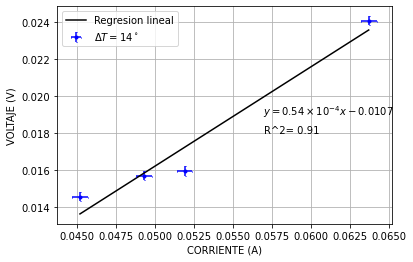

In [12]:
_x = np.linspace(np.min(datos3['I']*10**(-4)),np.max(datos3['I']*10**(-4)),2)
param = GetFit(datos3['I']*10**(-4),datos3['V']*10**(-4))
ym = GetModel(_x,param)

#plt.scatter(datos3['I']*10**(-4),datos3['V']*10**(-4),label=r'$\Delta T=14^\circ$')
plt.plot(_x,ym,color='k',label = "Regresion lineal")
plt.errorbar(datos3['I']*10**(-4),datos3['V']*10**(-4),xerr=0.0005,yerr=0.00025,capsize=0.5,color='b',fmt='.',label = r'$\Delta T=14^\circ$')
plt.text(569*10**(-4), 190*10**(-4), r'$y=0.54 \times 10^{-4}x -0.0107$')
plt.text(570*10**(-4),180*10**(-4),'R^2= {}'.format(0.91))
plt.xlabel('CORRIENTE (A)')
plt.ylabel('VOLTAJE (V)')
plt.grid()
plt.legend()
print(param[0])

-0.03197347852837291


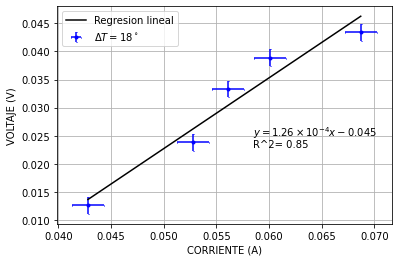

In [13]:
_x = np.linspace(np.min(datos4['I']*10**(-4)),np.max(datos4['I']*10**(-4)),2)
param = GetFit(datos4['I']*10**(-4),datos4['V']*10**(-4))
ym = GetModel(_x,param)

#plt.scatter(datos4['I']*10**(-4),datos4['V']*10**(-4),label=r'$\Delta T=18^\circ$')
plt.plot(_x,ym,color='k',label = "Regresion lineal")
plt.errorbar(datos4['I']*10**(-4),datos4['V']*10**(-4),xerr=0.0015,yerr=0.0015,capsize=0.5,color='b',fmt='.',label = r'$\Delta T=18^\circ$')
plt.text(585*10**(-4), 250*10**(-4), r'$y=1.26 \times 10^{-4}x - 0.045$')
plt.text(585*10**(-4),230*10**(-4),'R^2= {}'.format(0.85))
plt.xlabel('CORRIENTE (A)')
plt.ylabel('VOLTAJE (V)')
plt.grid()
plt.legend()
print(param[0]/param[1])

**Fotoconductividad**


In [4]:
Datos_1=Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Fotoconductividad_1.txt")
Datos_2=Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Fotoconductividad_2.txt")
Datos_2

,angulo,Cos,Iv_20,Iv_19,Iv_18,Iv_17,Iv_16,Iv_15,Iv_14,Iv_13,...,Iv_10,Iv_9,Iv_8,Iv_7,Iv_6,Iv_5,Iv_4,Iv_3,Iv_2,Iv_1
0,0,1.0000,0.11,0.10,0.10,0.09,0.09,0.08,0.08,0.07,...,0.06,0.06,0.05,0.04,0.03,0.03,0.02,0.01,0.01,0
1,10,0.9848,0.09,0.09,0.09,0.09,0.08,0.08,0.08,0.07,...,0.06,0.05,0.05,0.04,0.03,0.02,0.01,0.01,0.00,0
2,20,0.9396,0.09,0.07,0.09,0.08,0.07,0.06,0.07,0.06,...,0.05,0.05,0.04,0.03,0.03,0.02,0.01,0.01,0.00,0
3,30,0.8660,0.07,0.05,0.07,0.06,0.05,0.05,0.05,0.05,...,0.04,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.00,0
4,40,0.7660,0.05,0.04,0.06,0.04,0.04,0.03,0.04,0.03,...,0.03,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0
5,50,0.6427,0.03,0.02,0.03,0.02,0.02,0.02,0.02,0.02,...,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
6,60,0.5000,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


[-0.00152632  0.00566917]


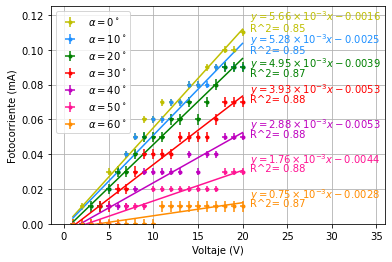

In [152]:
fig, ax = plt.subplots()
_x = np.linspace(np.min(Datos_1['V']),np.max(Datos_1['V']),2)

param_0 = GetFit(Datos_1['V'],Datos_1['I_0'],1)
ym_0 = GetModel(_x,param_0)
ax.plot(_x,ym_0,color='y')
ax.errorbar(Datos_1['V'],Datos_1['I_0'],label = r"$\alpha=0^\circ$",color='y',xerr=0.25,yerr=0.002,capsize=0.005,fmt='.')
plt.text(20.8, 0.117, r'$y=5.66 \times 10^{-3}x - 0.0016$',color='y')
plt.text(20.8,0.111,'R^2= {}'.format(0.85),color='y')
print(param_0)

param_1 = GetFit(Datos_1['V'],Datos_1['I_1'],1)
ym_1 = GetModel(_x,param_1)
ax.plot(_x,ym_1,color='#1E90FF')
ax.errorbar(Datos_1['V'],Datos_1['I_1'],label = r"$\alpha=10^\circ$",color='#1E90FF',xerr=0.25,yerr=0.002,capsize=0.005,fmt='.')
plt.text(20.8, 0.104, r'$y=5.28 \times 10^{-3}x - 0.0025$',color='#1E90FF')
plt.text(20.8,0.098,'R^2= {}'.format(0.85),color='#1E90FF')

param_2 = GetFit(Datos_1['V'],Datos_1['I_2'],1)
ym_2 = GetModel(_x,param_2)
ax.plot(_x,ym_2,color='g')
ax.errorbar(Datos_1['V'],Datos_1['I_2'],label = r"$\alpha=20^\circ$",color='g',xerr=0.3,yerr=0.003,capsize=0.005,fmt='.')
plt.text(20.8, 0.09, r'$y=4.95 \times 10^{-3}x - 0.0039$',color='g')
plt.text(20.8,0.085,'R^2= {}'.format(0.87),color='g')

param_3 = GetFit(Datos_1['V'],Datos_1['I_3'],1)
ym_3 = GetModel(_x,param_3)
ax.plot(_x,ym_3,color='r')
ax.errorbar(Datos_1['V'],Datos_1['I_3'],label = r"$\alpha=30^\circ$",color='r',xerr=0.25,yerr=0.003,capsize=0.005,fmt='.')
plt.text(20.8, 0.075, r'$y=3.93 \times 10^{-3}x - 0.0053$',color='r')
plt.text(20.8,0.07,'R^2= {}'.format(0.88),color='r')


param_4 = GetFit(Datos_1['V'],Datos_1['I_4'],1)
ym_4 = GetModel(_x,param_4)
ax.plot(_x,ym_4,color='m')
ax.errorbar(Datos_1['V'],Datos_1['I_4'],label = r"$\alpha=40^\circ$",color='m',xerr=0.25,yerr=0.002,capsize=0.005,fmt='.')
plt.text(20.8, 0.055, r'$y=2.88 \times 10^{-3}x - 0.0053$',color='m')
plt.text(20.8,0.05,'R^2= {}'.format(0.88),color='m')

param_5 = GetFit(Datos_1['V'],Datos_1['I_5'],1)
ym_5 = GetModel(_x,param_5)
ax.plot(_x,ym_5,color='#FF1493')
plt.errorbar(Datos_1['V'],Datos_1['I_5'],label = r"$\alpha=50^\circ$",color='#FF1493',xerr=0.25,yerr=0.002,capsize=0.005,fmt='.')
plt.text(20.8, 0.035, r'$y=1.76 \times 10^{-3}x - 0.0044$',color='#FF1493')
plt.text(20.8,0.03,'R^2= {}'.format(0.88),color='#FF1493')

param_6 = GetFit(Datos_1['V'],Datos_1['I_6'],1)
ym_6 = GetModel(_x,param_6)
ax.plot(_x,ym_6,color='#FF8C00')
plt.errorbar(Datos_1['V'],Datos_1['I_6'],label = r"$\alpha=60^\circ$",color='#FF8C00',xerr=0.3,yerr=0.003,capsize=0.005,fmt='.')
plt.text(20.8, 0.015, r'$y=0.75 \times 10^{-3}x - 0.0028$',color='#FF8C00')
plt.text(20.8,0.01,'R^2= {}'.format(0.87),color='#FF8C00')

plt.legend(loc='upper left')
plt.grid()

ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.xlim(-1.5,36)
plt.ylim(0,0.125)
plt.xlabel('Voltaje (V)')
plt.ylabel('Fotocorriente (mA)')

plt.show()
#pendientes1=np.array([param_1[1],param_2[1],param_3[1],param_4[1],param_5[1],param_6[1]])
#1/pendientes1

(0.45, 1.6)

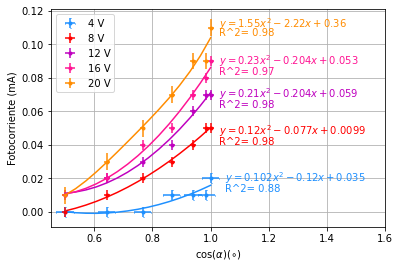

In [133]:
_x = np.linspace(np.min(Datos_2['Cos']),np.max(Datos_2['Cos']),15)

param_3 = GetFit(Datos_2['Cos'],Datos_2['Iv_4'],2)
ym_3 = GetModel(_x,param_3)
plt.plot(_x,ym_3,color='#1E90FF')
plt.errorbar(Datos_2['Cos'],Datos_2['Iv_4'],label = '4 V',color='#1E90FF',xerr=0.03,yerr=0.003,capsize=0.5,fmt='.')
plt.text(1.05, 0.018, r'$y=0.102x^2 -0.12x+ 0.035$',color='#1E90FF')
plt.text(1.05,0.012,'R^2= {}'.format(0.88),color='#1E90FF')


param_7 = GetFit(Datos_2['Cos'],Datos_2['Iv_8'],2)
ym_7 = GetModel(_x,param_7)
plt.plot(_x,ym_7,color='r')
plt.errorbar(Datos_2['Cos'],Datos_2['Iv_8'],label = '8 V',xerr=0.01,yerr=0.003,capsize=0.005,fmt='.',color='r')
plt.text(1.03, 0.046, r'$y=0.12x^2 -0.077x+ 0.0099$',color='r')
plt.text(1.03,0.04,'R^2= {}'.format(0.98),color='r')


param_11 = GetFit(Datos_2['Cos'],Datos_2['Iv_12'],2)
ym_11 = GetModel(_x,param_11)
plt.plot(_x,ym_11,color='m')
plt.errorbar(Datos_2['Cos'],Datos_2['Iv_12'],label = '12 V',color='m',xerr=0.01,yerr=0.003,capsize=0.005,fmt='.')
plt.text(1.03, 0.068, r'$y=0.21x^2 -0.204x+ 0.059$',color='m')
plt.text(1.03,0.062,'R^2= {}'.format(0.98),color='m')

param_15 = GetFit(Datos_2['Cos'],Datos_2['Iv_16'],2)
ym_15 = GetModel(_x,param_15)
plt.plot(_x,ym_15,color='#FF1493')
plt.errorbar(Datos_2['Cos'],Datos_2['Iv_16'],label = '16 V',color='#FF1493',xerr=0.01,yerr=0.003,capsize=0.005,fmt='.')
plt.text(1.03, 0.088, r'$y=0.23x^2 -0.204x+ 0.053$',color='#FF1493')
plt.text(1.03,0.082,'R^2= {}'.format(0.97),color='#FF1493')

param_19 = GetFit(Datos_2['Cos'],Datos_2['Iv_20'],4)
ym_19 = GetModel(_x,param_19)
plt.plot(_x,ym_19,color='#FF8C00')
plt.errorbar(Datos_2['Cos'],Datos_2['Iv_20'],label = '20 V',color='#FF8C00',xerr=0.01,yerr=0.005,capsize=0.005,fmt='.')
plt.text(1.03, 0.11, r'$y=1.55x^2 -2.22x+ 0.36$',color='#FF8C00')
plt.text(1.03,0.105,'R^2= {}'.format(0.98),color='#FF8C00')


plt.legend(loc='upper left')
plt.grid()
plt.xlabel(r'$\cos(\alpha) (\circ)$')
plt.ylabel('Fotocorriente (mA)')
plt.xlim(0.45,1.6)
